# ***<p style="color:#F26E7E;">Evli İnsanlarda Depresyon Verilerine Dayanarak Veri Görselleştirme Çalışması</p>***
<img src="https://mentaliumist.com/wp-content/uploads/2022/01/evlilik-depresyonu.jpg" width="60%">

## **<p style="color:#F26E7E;">Kaynaklar:</p>**
*  https://www.kaggle.com/datasets/babyoda/depression-in-married-couples
* https://mentaliumist.com/wp-content/uploads/2022/01/evlilik-depresyonu.jpg
* https://www.psikologofisi.com/beck-depresyon-testi
* https://serenpsikoterapi.com/beck-depresyon-olcegi-nedir/


#### ***<p style="color:#F26E7E;">Veriler, İstanbul'da çevrimiçi bir form aracılığıyla toplanmıştır. Evli kişilerin depresyon puanlarının ve demografik faktörlerin etkisinin incelenmesi amaçlanmaktadır.</p>***

## **<p style="color:#F26E7E;">2-Veri Setinin Tanımlanması</p>**

### **<p style="color:#F26E7E;">2.1-Kütüphanelerin Tanımlanması</p>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **<p style="color:#F26E7E;">2.2-Veri Setinin Tanımlanması</p>**

In [2]:
df = pd.read_csv("Dataset 1.csv")
df.head()

,No,Gender,Education,Working Status,Marriage Style,Status of Having a Child,B1,B2,B3,B4,...,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21
0,345,2,4,2,2,2,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,73,2,3,2,2,1,1,1,1,1,...,1,0,1,1,0,1,0,0,0,0
2,107,2,4,2,2,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
3,131,2,4,2,2,1,0,1,0,1,...,0,0,0,0,3,0,0,0,0,0
4,4,2,4,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* **<p style="color:#F26E7E;"> Gender: 1-Female, 2-Male;</p>**
* **<p style="color:#F26E7E;"> Education: 1-Primary, 2-High School, 3-Bachelor, 4-Msc or PhD;</p>**
* **<p style="color:#F26E7E;"> Working Status: 1-Employed, 2-Unemployed;</p>**
* **<p style="color:#F26E7E;"> Marriage Style : 1-Arranged Marriage, 2-Flirt Marriage;</p>**
* **<p style="color:#F26E7E;"> Status of Having a Child: 1-Yes, 2-No</p>**

In [3]:
# Veri seti hakkında temel bilgileri öğrenmek için
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   No                        433 non-null    int64
 1   Gender                    433 non-null    int64
 2   Education                 433 non-null    int64
 3   Working Status            433 non-null    int64
 4   Marriage Style            433 non-null    int64
 5   Status of Having a Child  433 non-null    int64
 6   B1                        433 non-null    int64
 7   B2                        433 non-null    int64
 8   B3                        433 non-null    int64
 9   B4                        433 non-null    int64
 10  B5                        433 non-null    int64
 11  B6                        433 non-null    int64
 12  B7                        433 non-null    int64
 13  B8                        433 non-null    int64
 14  B9                        433 non-null    

In [4]:
df.isna().sum()

No                          0
Gender                      0
Education                   0
Working Status              0
Marriage Style              0
Status of Having a Child    0
B1                          0
B2                          0
B3                          0
B4                          0
B5                          0
B6                          0
B7                          0
B8                          0
B9                          0
B10                         0
B11                         0
B12                         0
B13                         0
B14                         0
B15                         0
B16                         0
B17                         0
B18                         0
B19                         0
B20                         0
B21                         0
dtype: int64

In [5]:
print(f"Veri Sayısı: {df.shape[0]}\nÖzellik Sayısı: {df.shape[1]}")

Veri Sayısı: 433
Özellik Sayısı: 27


# **<p style="color:#F26E7E;">Beck Depresyon Ölçeği (BDI) Nedir?</p>**

**<p style="color:#F26E7E;">Beck Depresyon Ölçeği ya da diğer adıyla envanteri, 1961 yılında Beck ve arkadaşları tarafından geliştirilmiş, depresyonun karakteristik özelliklerini ve semptomlarını değerlendiren bir ölçektir. Geliştirildiği günden bu yana çeşitli güncellemelerle farklı versiyonları çıkmıştır.<br><br>Ölçek, kişinin kendi kendine doldurduğu (Self-Report) bir ölçektir. Uygulanması için uygulayıcı bir klinisyen gerektirmez. 21 maddeden oluşur ve tamamlaması yaklaşık 10 dakika sürer.<br><br>Her bir madde 0-3 arasında çoktan seçmelidir. Kişi kendisini en iyi tanımlayan seçeneği işaretler.<br><br>Daha sonra, her bir maddeye verdiği puan toplanır. Ölçekten alınabilecek en düşük puan 0, en yüksek puanı ise 63’tür.<br><br>Ortaya çıkan toplam puana göre; yok-hafif, hafif-orta, orta-şiddetli ya da şiddetli olduğu sonucunu verir.<br><br>0-9: Minimal Depresyon.
<br>
<br>
10-16: Hafif Depresyon.
<br>
<br>
17-29: Orta Depresyon.
<br><br>
30-63: Şiddetli Depresyon.</p>**



## **<p style="color:#F26E7E;">3- Veri Manipülasyonu</p>**

In [6]:
#Veri Setindeki Soruların Cevaplarını Toplayıp Kişilerin Depresyonu Hakkında Yorumlama
df['BDI'] = df['B1']+df['B2']+df['B3']+df['B4']+df['B5']+df['B6']+df['B7']+df['B8']+df['B9']+df['B10']+df['B11']+df['B12']+df['B13']+df['B14']+df['B15']+df['B16']+df['B17']+df['B18']+df['B19']+df['B20']+df['B21']
df = df.drop(['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10','B11','B12','B13','B14','B15','B16','B17','B18','B19','B20','B21'], axis = 1) 
df2 = df
df.head()

,No,Gender,Education,Working Status,Marriage Style,Status of Having a Child,BDI
0,345,2,4,2,2,2,61
1,73,2,3,2,2,1,12
2,107,2,4,2,2,1,8
3,131,2,4,2,2,1,6
4,4,2,4,2,1,1,1


In [7]:
df["Working Status"] = df["Working Status"].replace(2,0)
print("Çalışan kişi sayısı: \n",df["Working Status"].value_counts())
df["Marriage Style"] = df["Marriage Style"].replace(2,0)
print("Görücü Usülü Evlenen kİşi Sayısı: \n",df["Marriage Style"].value_counts())
df["Status of Having a Child"] = df["Status of Having a Child"].replace(2,0)
print("Çocuk sahibi olan kişi sayısı:\n",df["Status of Having a Child"].value_counts())

Çalışan kişi sayısı: 
 0    295
1    138
Name: Working Status, dtype: int64
Görücü Usülü Evlenen kİşi Sayısı: 
 0    314
1    119
Name: Marriage Style, dtype: int64
Çocuk sahibi olan kişi sayısı:
 1    297
0    136
Name: Status of Having a Child, dtype: int64


In [8]:
df2 = df.copy()
df2.head()

,No,Gender,Education,Working Status,Marriage Style,Status of Having a Child,BDI
0,345,2,4,0,0,0,61
1,73,2,3,0,0,1,12
2,107,2,4,0,0,1,8
3,131,2,4,0,0,1,6
4,4,2,4,0,1,1,1


In [9]:
eğitim = {1:"İlköğretim",2:"Lise",3:"Lisans",4:"Yüksek_Lisans"}
df["Education"].replace(eğitim,inplace=True)
cinsiyet = {1:"Kadın",2:"erkek"}
df["Gender"].replace(cinsiyet,inplace=True)
iş = {1:"Çalışıyor",0:"Çalışmıyor"}
df["Working Status"].replace(iş,inplace=True)
evlilik = {1:"Görücü",0:"Aşk Evliliği"}
df["Marriage Style"].replace(evlilik,inplace=True)
çocuk = {1:"Çocuğu Var",0:"Çocuğu Yok"}
df["Status of Having a Child"].replace(çocuk,inplace=True)

In [10]:
df["BDI"].sort_values(ascending=False).value_counts().sort_index(ascending=False)

61     2
40     1
39     1
38     1
36     1
35     1
34     1
33     1
32     1
31     1
29     2
28     3
27     5
26     5
25     7
24     7
23     6
22    11
21     7
20     5
19    13
18     7
17     7
16     7
15     9
14    11
13    23
12    16
11    15
10    16
9     14
8     26
7     17
6     23
5     27
4     23
3     21
2     23
1     23
0     43
Name: BDI, dtype: int64

In [11]:
etiketler = ["Minimal Depresyon","Hafif Depresyon","Orta Depresyon","Şiddetli Depresyon"]
df["Depresyon Aralığı"] = pd.cut(df['BDI'],
                              bins=[-1, 9, 16, 29, 63],
                              labels=etiketler)

df.head()

,No,Gender,Education,Working Status,Marriage Style,Status of Having a Child,BDI,Depresyon Aralığı
0,345,erkek,Yüksek_Lisans,Çalışmıyor,Aşk Evliliği,Çocuğu Yok,61,Şiddetli Depresyon
1,73,erkek,Lisans,Çalışmıyor,Aşk Evliliği,Çocuğu Var,12,Hafif Depresyon
2,107,erkek,Yüksek_Lisans,Çalışmıyor,Aşk Evliliği,Çocuğu Var,8,Minimal Depresyon
3,131,erkek,Yüksek_Lisans,Çalışmıyor,Aşk Evliliği,Çocuğu Var,6,Minimal Depresyon
4,4,erkek,Yüksek_Lisans,Çalışmıyor,Görücü,Çocuğu Var,1,Minimal Depresyon


In [12]:
sütunlar={"No":"Numara","BDI":"BDI","Çalışma_Çalışmıyor":"Çalışmıyor","Çalışma_Çalışıyor":"Çalışıyor","Aşk_Görücü":"Görücü_evlilik","Aşk_Aşk Evliliği":"Severek_evlilik",
          "Çocuk Sahibi_Çocuğu Yok":"Çocuğu_yok","Çocuk Sahibi_Çocuğu Var":"Çocuğu_var","Öğrenim durumu_İlköğretim":"İlköğretim","Öğrenim durumu_Lise":"Lise",
          "Öğrenim durumu_Lisans":"Lisans","Öğrenim durumu_Yüksek_Lisans":"Yüksek_Lisans","Cinsiyet_Kadın":"Kadın","Cinsiyet_erkek":"Erkek"}

In [13]:
get_dummied = pd.concat([pd.get_dummies(df["Working Status"],prefix=("Çalışma")),
                         pd.get_dummies(df["Marriage Style"],prefix=("Aşk")),
                         pd.get_dummies(df["Status of Having a Child"],prefix=("Çocuk Sahibi")),
                         pd.get_dummies(df["Education"],prefix="Öğrenim durumu"),
                         pd.get_dummies(df["Gender"],prefix=("Cinsiyet"))],axis=1)
get_dummied = pd.concat([df,get_dummied],axis=1)
get_dummied.drop(["Working Status","Marriage Style","Status of Having a Child","Education","Gender","Depresyon Aralığı"],axis=1,inplace=True)
get_dummied.rename(sütunlar,inplace=True,axis=1)
get_dummied.head()

,Numara,BDI,Çalışmıyor,Çalışıyor,Severek_evlilik,Görücü_evlilik,Çocuğu_var,Çocuğu_yok,Lisans,Lise,Yüksek_Lisans,İlköğretim,Kadın,Erkek
0,345,61,1,0,1,0,0,1,0,0,1,0,0,1
1,73,12,1,0,1,0,1,0,1,0,0,0,0,1
2,107,8,1,0,1,0,1,0,0,0,1,0,0,1
3,131,6,1,0,1,0,1,0,0,0,1,0,0,1
4,4,1,1,0,0,1,1,0,0,0,1,0,0,1


<AxesSubplot:>

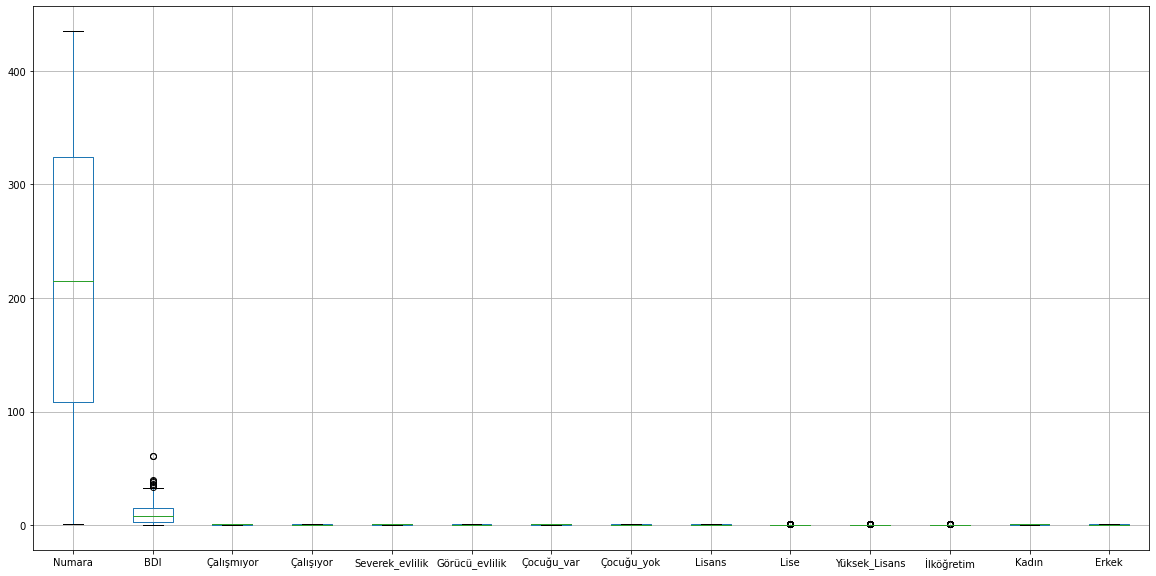

In [14]:
plt.figure(figsize=(20,10))
get_dummied.boxplot()

In [15]:
print(get_dummied["Lise"].unique(),
      get_dummied["Yüksek_Lisans"].unique(),
      get_dummied["İlköğretim"].unique())

[0 1] [1 0] [0 1]


In [16]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR=Q3-Q1
Q1=pd.DataFrame(Q1)
Q3=pd.DataFrame(Q3)
IQR=pd.DataFrame(IQR,columns=["IQR"])
sonuc = pd.concat([Q1, Q3,IQR], axis=1, join="inner")
sonuc


,0.25,0.75,IQR
No,108.0,324.0,216.0
Gender,1.0,2.0,1.0
Education,2.0,3.0,1.0
Working Status,0.0,1.0,1.0
Marriage Style,0.0,1.0,1.0
Status of Having a Child,0.0,1.0,1.0
BDI,3.0,15.0,12.0


c:\Users\90538\anaconda3\envs\Bty\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


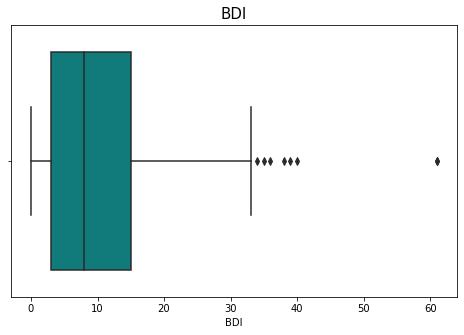

BDI Alt Sınır:  -15.0
BDI Üst Sınır:  33.0
BDI  Sütununun Üst Sınırdan Yüksek olan Veri Sayısı:  8
BDI  Sütununun Alt Sınırdan Az olan Veri Sayısı:  0

Q1: 3.0 
Q3: 15.0 
IQR: 12.0



In [17]:
    Q1=df2["BDI"].quantile(0.25)
    Q3=df2["BDI"].quantile(0.75)
    IQR=Q3-Q1
    alt_sinir = Q1-(IQR*1.5)
    ust_sinir = Q3+(IQR*1.5)
    plt.figure(figsize=(8,5))
    sns.boxplot(df2["BDI"],color="darkcyan")
    plt.title("BDI", size=15)
    plt.show()
    print("BDI","Alt Sınır: ",alt_sinir)
    print("BDI","Üst Sınır: ",ust_sinir)
    print("BDI"," Sütununun Üst Sınırdan Yüksek olan Veri Sayısı: ",df2["BDI"][df2["BDI"]>ust_sinir].count())
    print("BDI"," Sütununun Alt Sınırdan Az olan Veri Sayısı: ",df2["BDI"][df2["BDI"]<alt_sinir].count())
    print("\nQ1: {} \nQ3: {} \n""IQR: {}\n".format(Q1, Q3, IQR))


In [18]:
df2[df2["BDI"]>33]

,No,Gender,Education,Working Status,Marriage Style,Status of Having a Child,BDI
0,345,2,4,0,0,0,61
118,213,2,2,0,1,1,40
150,431,2,2,1,0,1,38
154,71,1,4,0,0,1,36
295,371,1,4,0,0,0,39
391,356,1,3,1,0,0,61
415,263,1,2,1,1,1,34
417,175,1,2,1,0,1,35


**<p style="color:#F26E7E;">0-9: Minimal Depresyon.
<br>
<br>
10-16: Hafif Depresyon.
<br>
<br>
17-29: Orta Depresyon.
<br><br>
30-63: Şiddetli Depresyon.</p>**

c:\Users\90538\anaconda3\envs\Bty\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BDI', ylabel='Density'>

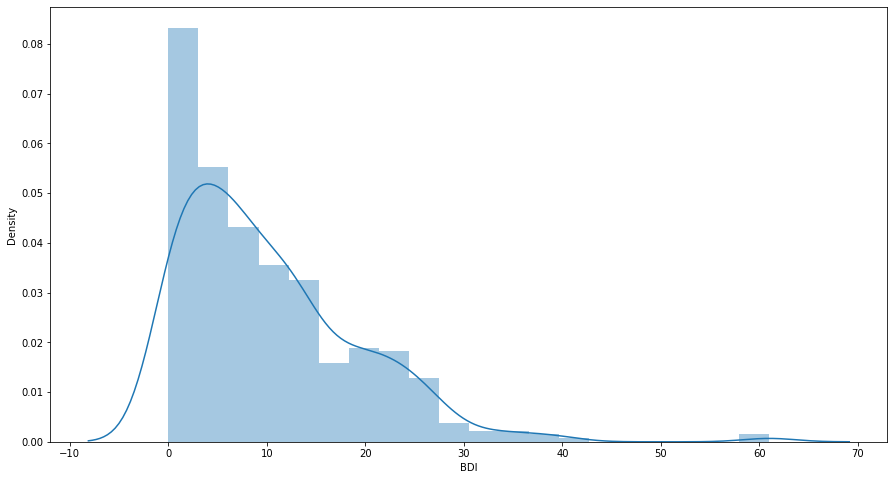

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(df["BDI"])

In [20]:
df["BDI"].sort_values(ascending=False).value_counts().sort_index(ascending=False)

61     2
40     1
39     1
38     1
36     1
35     1
34     1
33     1
32     1
31     1
29     2
28     3
27     5
26     5
25     7
24     7
23     6
22    11
21     7
20     5
19    13
18     7
17     7
16     7
15     9
14    11
13    23
12    16
11    15
10    16
9     14
8     26
7     17
6     23
5     27
4     23
3     21
2     23
1     23
0     43
Name: BDI, dtype: int64

In [21]:
df[df["BDI"]==61]

,No,Gender,Education,Working Status,Marriage Style,Status of Having a Child,BDI,Depresyon Aralığı
0,345,erkek,Yüksek_Lisans,Çalışmıyor,Aşk Evliliği,Çocuğu Yok,61,Şiddetli Depresyon
391,356,Kadın,Lisans,Çalışıyor,Aşk Evliliği,Çocuğu Yok,61,Şiddetli Depresyon


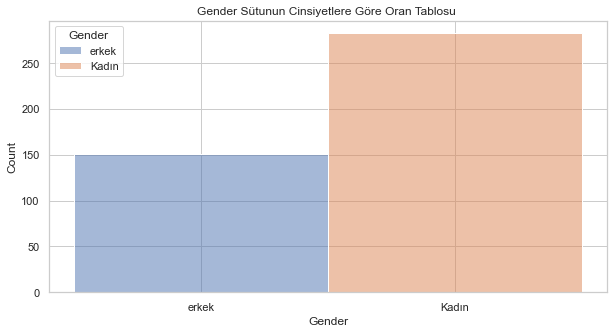

Gender 

Kadın    0.65127
erkek    0.34873
Name: Gender, dtype: float64 




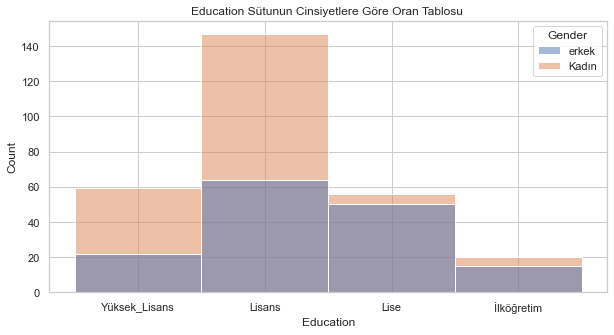

Education 

Lisans           0.487298
Lise             0.244804
Yüksek_Lisans    0.187067
İlköğretim       0.080831
Name: Education, dtype: float64 




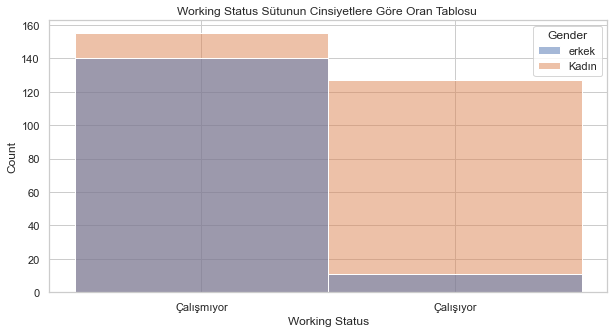

Working Status 

Çalışmıyor    0.681293
Çalışıyor     0.318707
Name: Working Status, dtype: float64 




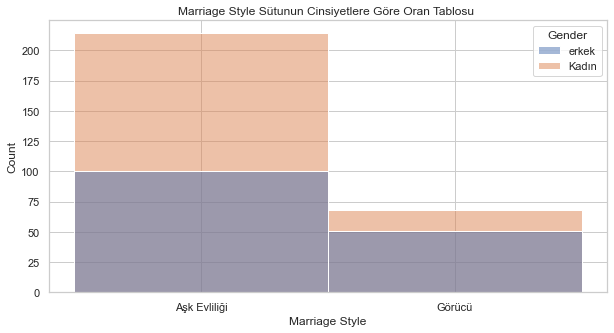

Marriage Style 

Aşk Evliliği    0.725173
Görücü          0.274827
Name: Marriage Style, dtype: float64 




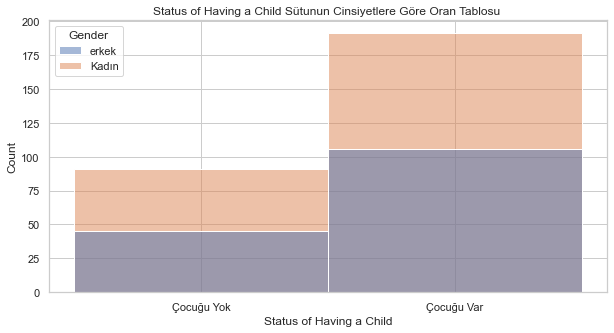

Status of Having a Child 

Çocuğu Var    0.685912
Çocuğu Yok    0.314088
Name: Status of Having a Child, dtype: float64 




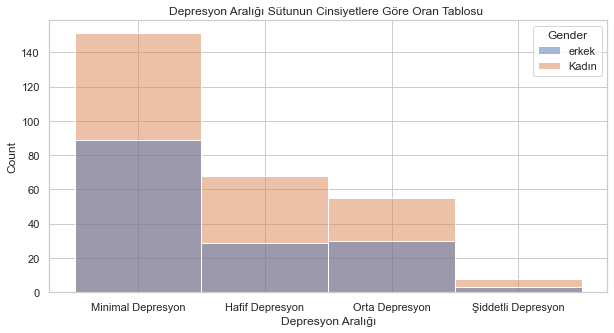

Depresyon Aralığı 

Minimal Depresyon     0.554273
Hafif Depresyon       0.224018
Orta Depresyon        0.196305
Şiddetli Depresyon    0.025404
Name: Depresyon Aralığı, dtype: float64 




In [22]:
for i in df.drop(["No","BDI"],axis=1):
    plt.figure(figsize=(10,5))
    sns.set_theme(style="whitegrid")
    plt.title("{} Sütunun Cinsiyetlere Göre Oran Tablosu ".format(i))
    sns.histplot(data=df,x=i,hue="Gender",color="Green")
    plt.show()
    print(i,"\n")
    print(df[i].value_counts(normalize=True),"\n\n")

In [23]:
female = df[df["Gender"]=="Kadın"]
male = df[df["Gender"]=="erkek"]

In [24]:
kadınlardf=pd.DataFrame(female["BDI"].describe())
erkeklerdf=pd.DataFrame(male["BDI"].describe())
BDI_Oranları = pd.concat([kadınlardf,erkeklerdf],axis=1)
BDI_Oranları.columns = ["Kadınların BDI Oranları","Erkeklerin BDI Oranları"]
BDI_Oranları

,Kadınların BDI Oranları,Erkeklerin BDI Oranları
count,282.000000,151.000000
mean,10.613475,9.821192
std,9.002742,9.335299
min,0.000000,0.000000
25%,4.000000,3.000000
50%,8.000000,8.000000
75%,15.000000,14.000000
max,61.000000,61.000000


Erkeklerde Depresyon Oran Yüzdeleri 

 Minimal Depresyon     0.589404
Orta Depresyon        0.198675
Hafif Depresyon       0.192053
Şiddetli Depresyon    0.019868
Name: Depresyon Aralığı, dtype: float64 




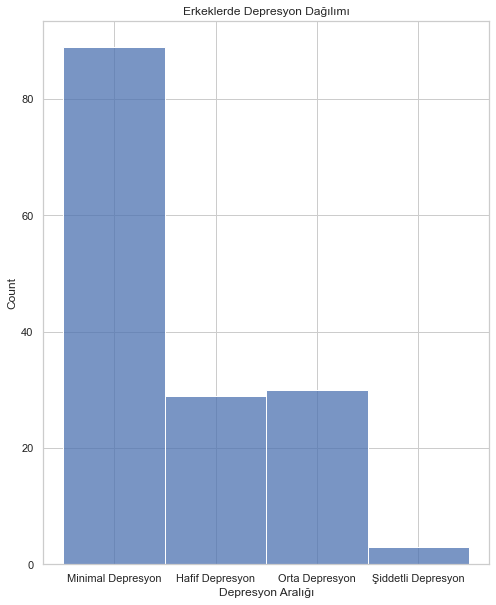

Kadınlarda Depresyon Oran Yüzdeleri 

 Minimal Depresyon     0.535461
Hafif Depresyon       0.241135
Orta Depresyon        0.195035
Şiddetli Depresyon    0.028369
Name: Depresyon Aralığı, dtype: float64 




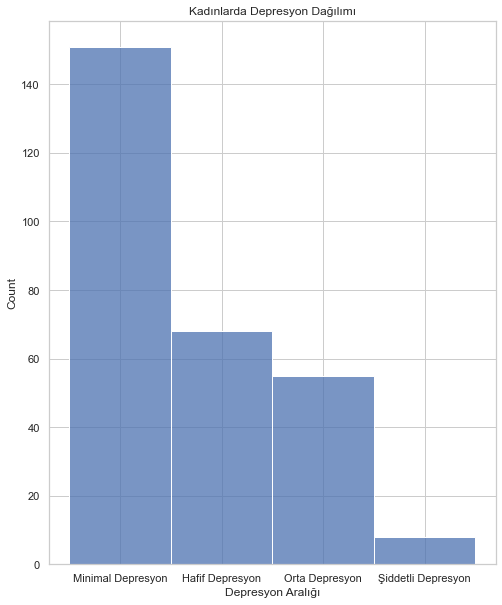

In [25]:
plt.figure(figsize=(8,10))
plt.title("Erkeklerde Depresyon Dağılımı")
sns.histplot(data=male,x="Depresyon Aralığı")
print("Erkeklerde Depresyon Oran Yüzdeleri \n\n",male["Depresyon Aralığı"].value_counts(normalize=True),"\n\n")
plt.show()
plt.figure(figsize=(8,10))
plt.title("Kadınlarda Depresyon Dağılımı")
sns.histplot(data=female,x="Depresyon Aralığı")
print("Kadınlarda Depresyon Oran Yüzdeleri \n\n",female["Depresyon Aralığı"].value_counts(normalize=True),"\n\n")
plt.show()

<AxesSubplot:xlabel='BDI', ylabel='Count'>

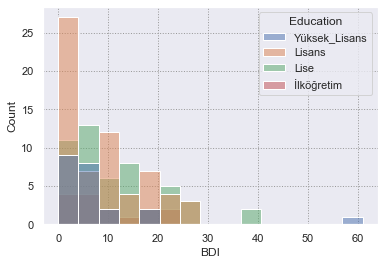

In [31]:
sns.histplot(data=male,x="BDI",legend=True, hue="Education",color="red")

<AxesSubplot:title={'center':"Get_Dummied DataFrame'inin Korelasyon Tablosu"}>

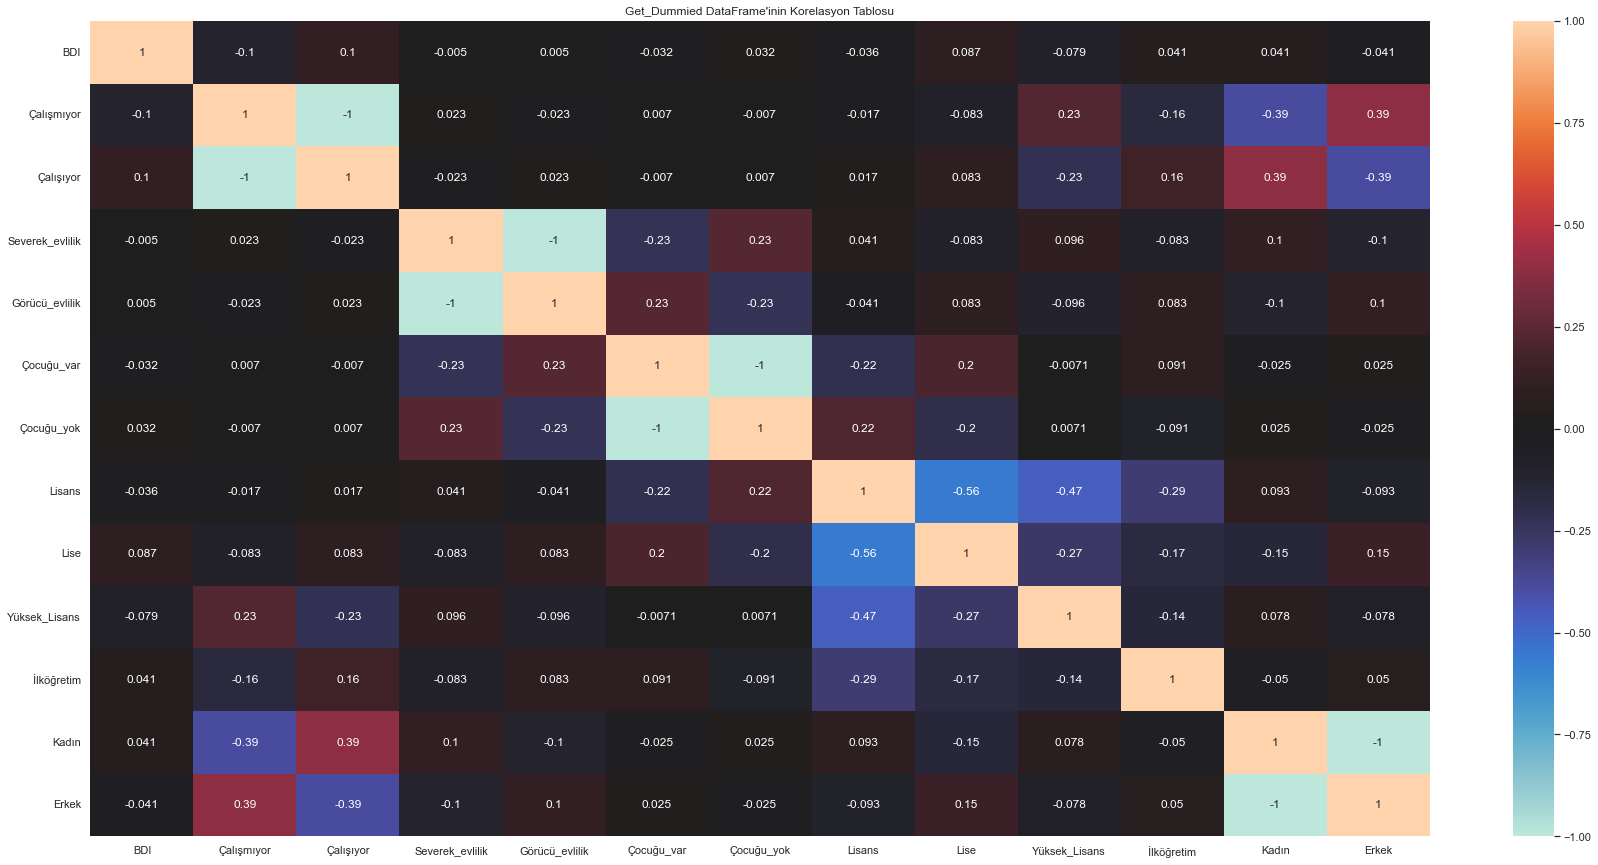

In [26]:
plt.figure(figsize=(30,15))
plt.title("Get_Dummied DataFrame'inin Korelasyon Tablosu")
sns.heatmap(get_dummied.drop("Numara",axis=1).corr(),annot=True,cmap="icefire")

In [27]:
pivot = df.pivot_table("BDI",index="Gender",columns="Education")
pivot

Education,Lisans,Lise,Yüksek_Lisans,İlköğretim
Gender,,,,
Kadın,10.551020,11.821429,9.016949,12.400000
erkek,8.734375,11.640000,8.363636,10.533333


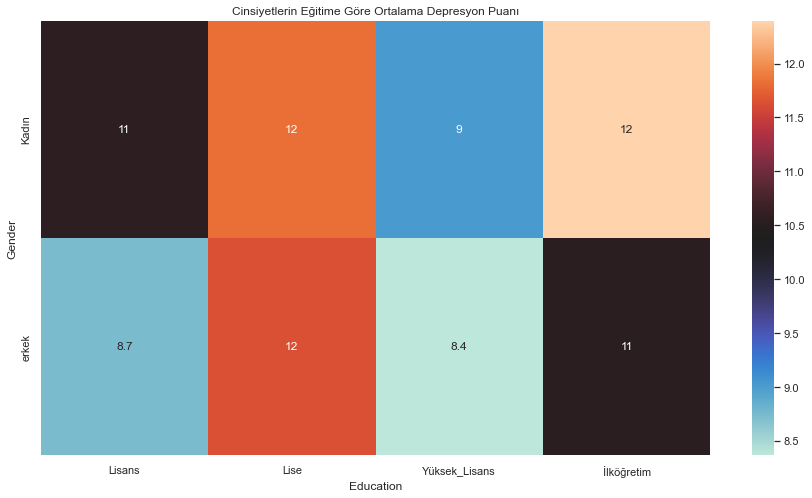

In [28]:
plt.figure(figsize=(15,8))
plt.title("Cinsiyetlerin Eğitime Göre Ortalama Depresyon Puanı")
sns.heatmap(pivot,annot=True,cmap="icefire")
plt.show()

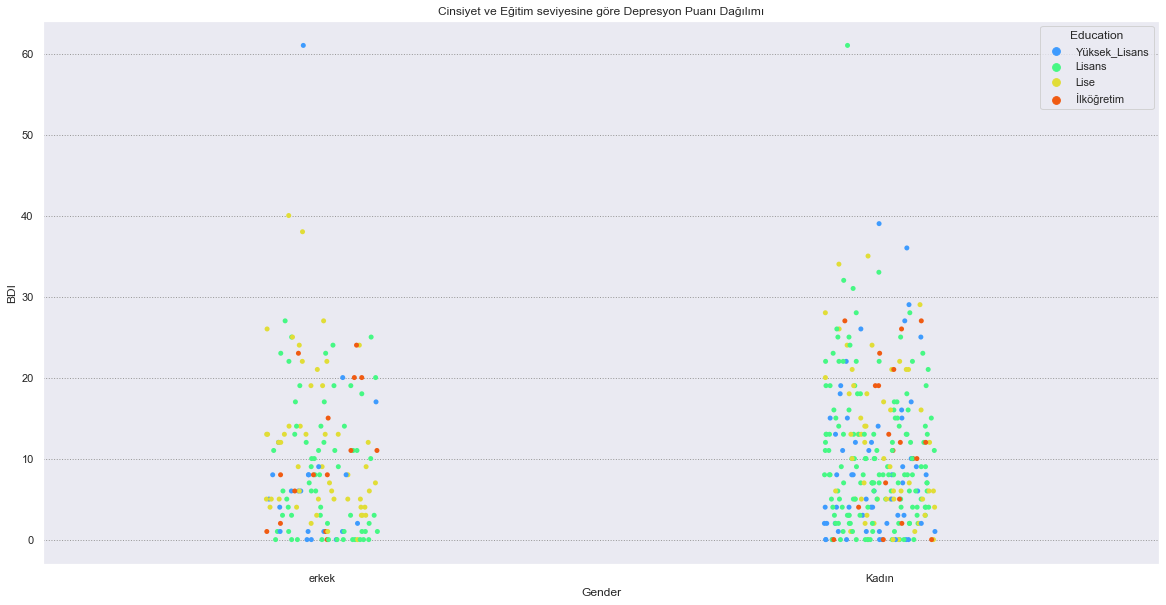

<AxesSubplot:title={'center':'Cinsiyet ve Eğitim seviyesine göre Depresyon Puanı Dağılımı'}, xlabel='Education', ylabel='BDI'>

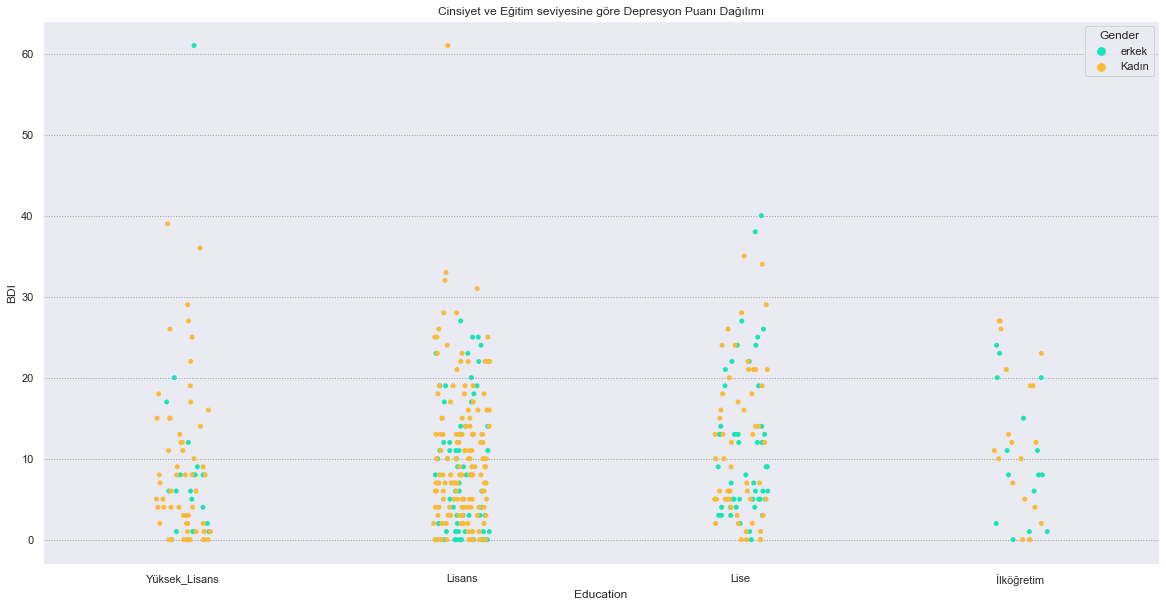

In [29]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title("Cinsiyet ve Eğitim seviyesine göre Depresyon Puanı Dağılımı")
sns.stripplot(data=df,x="Gender",y="BDI",hue="Education",palette="turbo")
plt.show()
plt.figure(figsize=(20,10))
plt.title("Cinsiyet ve Eğitim seviyesine göre Depresyon Puanı Dağılımı")
sns.stripplot(data=df,x="Education",y="BDI",hue="Gender",palette="turbo")



In [30]:
df[df["Education"]=="Lisans"]

,No,Gender,Education,Working Status,Marriage Style,Status of Having a Child,BDI,Depresyon Aralığı
1,73,erkek,Lisans,Çalışmıyor,Aşk Evliliği,Çocuğu Var,12,Hafif Depresyon
5,164,erkek,Lisans,Çalışmıyor,Aşk Evliliği,Çocuğu Var,2,Minimal Depresyon
14,417,erkek,Lisans,Çalışmıyor,Görücü,Çocuğu Var,10,Hafif Depresyon
16,129,erkek,Lisans,Çalışmıyor,Görücü,Çocuğu Var,8,Minimal Depresyon
19,192,erkek,Lisans,Çalışmıyor,Aşk Evliliği,Çocuğu Yok,0,Minimal Depresyon
...,...,...,...,...,...,...,...,...
422,177,Kadın,Lisans,Çalışıyor,Aşk Evliliği,Çocuğu Var,16,Hafif Depresyon
424,325,Kadın,Lisans,Çalışıyor,Aşk Evliliği,Çocuğu Var,4,Minimal Depresyon
425,305,Kadın,Lisans,Çalışıyor,Aşk Evliliği,Çocuğu Var,24,Orta Depresyon
426,255,Kadın,Lisans,Çalışıyor,Aşk Evliliği,Çocuğu Var,8,Minimal Depresyon
